In [1]:
import scanpy as sc
import scvelo as scv
import pandas as pd
import cellrank as cr
import scipy
import scipy.io
import numpy as np
import anndata as ad
import os.path
scv.set_figure_params()
scv.settings.set_figure_params('scvelo')

subset_id = "VM_early_EB"

work_dir = "../subsets/Py_scvelo/"
dataset_path = "../subsets/ProtocolEarlyLateSubsets_ClustUMAP_toPy/subsets/"

In [2]:
dataset_path = dataset_path+subset_id+"/"
resultdir = work_dir+subset_id+"_output"
os.makedirs(resultdir)
os.chdir(resultdir)

#### Data locations & Other parameters

In [3]:
## Data locations ##
raw_spliced_path = dataset_path + "seurat_sf_counts.mtx"
raw_unspliced_path = dataset_path + "seurat_uf_counts.mtx"

features_path = dataset_path + "seurat_sf_genes.tsv"
barcodes_path = dataset_path + "seurat_sf_barcodes.tsv"
metadata_path = dataset_path + "seurat_metadata.csv"
umap_path = dataset_path + "seurat_umap_embedding.csv"
HVG_path = dataset_path + "seurat_integrated_genes.tsv"

## Parameters to set ##
pc_set = 20
cluster_ident = "coarse_seurat_clusters"

#### Loading data

In [4]:
raw_spliced = scipy.io.mmread(raw_spliced_path)
raw_unspliced = scipy.io.mmread(raw_unspliced_path)
metadata = pd.read_csv(metadata_path, index_col = 0)
umap_embedding = np.asmatrix(pd.read_csv(umap_path, index_col = 0))

In [5]:
## Edits to make adata.var matrix
barcodedata = pd.read_csv(barcodes_path, sep = "\t", header = None)[0].to_list()
featuredata = pd.read_csv(features_path, sep = "\t", header = None)[0].to_list()
featuredata = pd.DataFrame(featuredata, index = featuredata)
featuredata.columns = ['gene']
HVG = pd.read_csv(HVG_path, sep = "\t", header = None)[0].to_list()

In [6]:
metadata.index = barcodedata
raw_spliced.index = barcodedata
raw_unspliced.index = barcodedata

In [7]:
## Building the adata object, matrices from Seurat need Transposing before adding.
adata = ad.AnnData(X = raw_spliced.todense().T,
                   obs = metadata,
                   var = featuredata
                  )
adata.layers["spliced"] = raw_spliced.todense().T
adata.layers["unspliced"] = raw_unspliced.todense().T
adata.obsm["X_umap"] = umap_embedding

In [8]:
len(metadata.index)

2316

In [9]:
adata.layers["spliced"][1:10,1:10]

matrix([[0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 3, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
adata.layers
#adata.var['vst.variable']

Layers with keys: spliced, unspliced

In [11]:
adata.X[1:10,1:10]

array([[0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
adata.obs.head()

orig.ident  nCount_sf  nFeature_sf  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1      GRCh38       4687         2471   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_P14     GRCh38       6073         2788   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_C12     GRCh38       5892         2886   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_L14     GRCh38       2066         1177   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_M2      GRCh38       5792         2656   

                                          Genome Spikein  Reporter Method  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1   GRCh38    ERCC  reporter     EB   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_P14  GRCh38    ERCC  reporter     EB   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_C12  GRCh38    ERCC  reporter     EB   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_L14  GRCh38    ERCC  reporter     EB   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_M2   GRCh38    ERCC  reporter     EB   

                                         Lineage Timepoint  Replicate  ...  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1       VM       d10          1  ...   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_P14      VM       d10          1  ...   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_C12      VM       d10          1  ...   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_L14      VM       d10          1  ...   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_M2       VM       d10          1  ...   

                                         Phase integrated_snn_res.0.9  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1     G1                      3   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_P14    G1                      3   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_C12    G1                     10   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_L14    G1                      0   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_M2     G1                     10   

                                         coarse_seurat_clusters  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1                       3   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_P14                      3   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_C12                     10   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_L14                      0   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_M2                      10   

                                          seurat_clusters_atlas1.5  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1                         12   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_P14                        12   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_C12                        16   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_L14                         3   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_M2                         16   

                                          coarse_seurat_clusters_atlas  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1                              3   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_P14                             3   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_C12                            10   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_L14                             0   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_M2                             10   

                                          Protocol_AM_early_EB  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1                    NaN   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_P14                   NaN   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_C12                   NaN   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_L14                   NaN   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_M2                    NaN   

                                          Protocol_AM_late_Mon  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1                    NaN   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_P14                   NaN   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_C12                   NaN   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_L14                   NaN   
GRCh38_ERCC_reporter_EB_VM_d10_1_941_M2                    NaN   

                                          Protocol_AM_late_EHT  \
GRCh38_ERCC_reporter_EB_VM_d10_1_941_D1                    NaN   


In [13]:
adata.obs = adata.obs.astype(str)

... storing 'orig.ident' as categorical
... storing 'nCount_sf' as categorical
... storing 'nFeature_sf' as categorical
... storing 'Genome' as categorical
... storing 'Spikein' as categorical
... storing 'Reporter' as categorical
... storing 'Method' as categorical
... storing 'Lineage' as categorical
... storing 'Timepoint' as categorical
... storing 'Replicate' as categorical
... storing 'Library' as categorical
... storing 'Well' as categorical
... storing 'combined_id' as categorical
... storing 'nCounts' as categorical
... storing 'nGene' as categorical
... storing 'sum' as categorical
... storing 'detected' as categorical
... storing 'altexps_ERCC_sum' as categorical
... storing 'altexps_ERCC_detected' as categorical
... storing 'altexps_ERCC_percent' as categorical
... storing 'altexps_MT_sum' as categorical
... storing 'altexps_MT_detected' as categorical
... storing 'altexps_MT_percent' as categorical
... storing 'total' as categorical
... storing 'use' as categorical
... sto

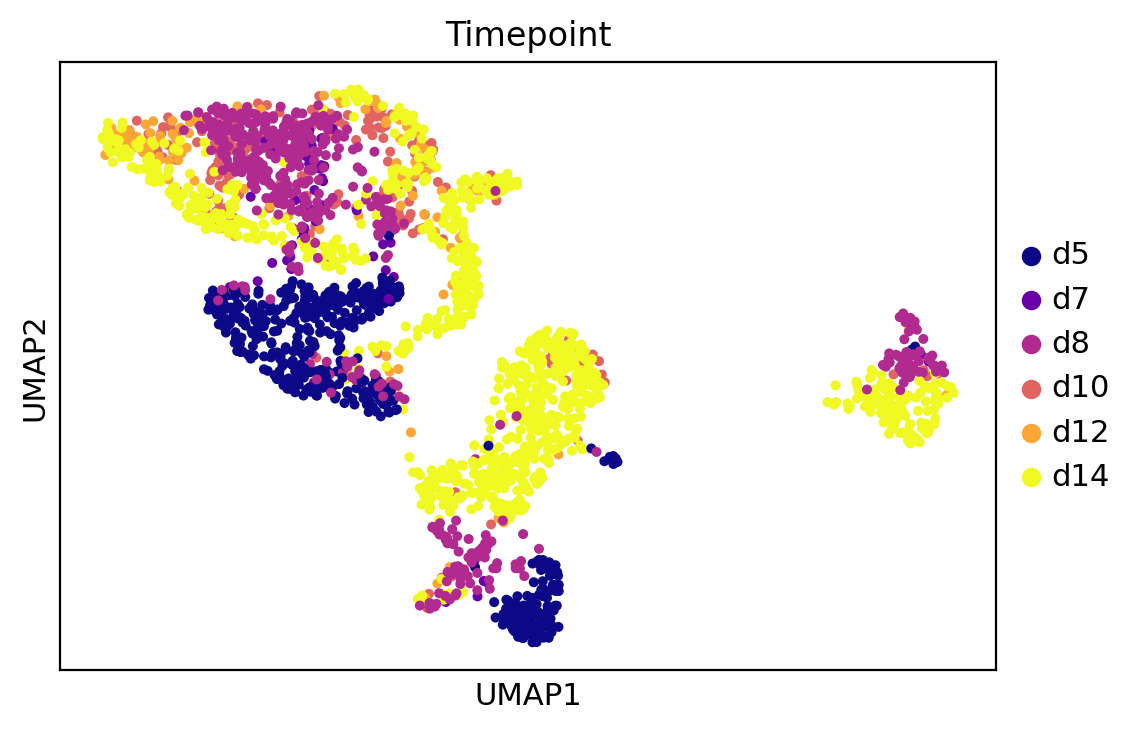

In [14]:
sc.pl.umap(adata, color = "Timepoint", palette = "plasma")

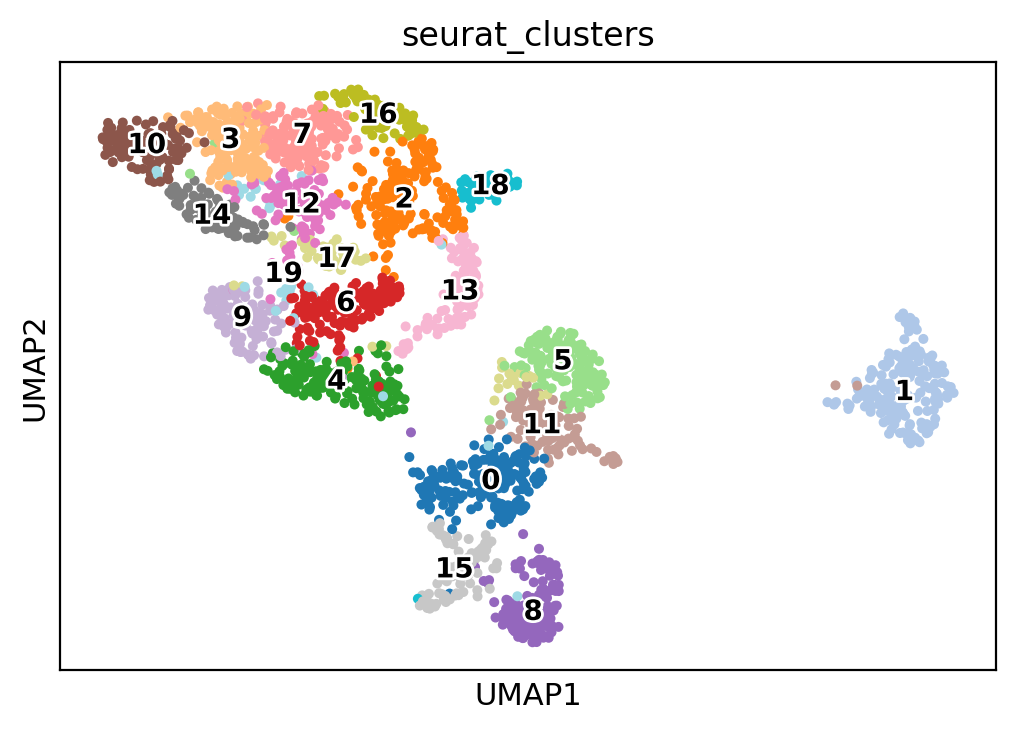

In [15]:
sc.pl.umap(adata, color = "seurat_clusters", palette = "tab20", legend_loc='on data', legend_fontsize=10, legend_fontoutline=2,)

In [16]:
### Running needed steps to determine Velocity
np.shape(adata.X)

(2316, 20799)

In [17]:
#scv.pl.proportions(adata, groupby="seurat_clusters")

In [18]:
adata.obsm['X_umap']

matrix([[-0.69748541,  4.82520525],
        [-1.18352723,  5.95537607],
        [ 5.38317195, -2.2601846 ],
        ...,
        [-6.59524879,  7.77219336],
        [-5.3774043 ,  6.85296576],
        [-4.32177481,  2.93874543]])

In [19]:
scv.pp.filter_and_normalize(adata, min_shared_counts=None, n_top_genes=None)
#scv.pp.normalize_per_cell(adata, layers = ["X", "spliced", "unspliced"])
adata.raw = adata


Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [20]:
adata = adata[:,adata.var.index.isin(HVG)]

In [21]:
adata

View of AnnData object with n_obs × n_vars = 2316 × 2000
    obs: 'orig.ident', 'nCount_sf', 'nFeature_sf', 'Genome', 'Spikein', 'Reporter', 'Method', 'Lineage', 'Timepoint', 'Replicate', 'Library', 'Well', 'combined_id', 'nCounts', 'nGene', 'sum', 'detected', 'altexps_ERCC_sum', 'altexps_ERCC_detected', 'altexps_ERCC_percent', 'altexps_MT_sum', 'altexps_MT_detected', 'altexps_MT_percent', 'total', 'use', 'nCount_uf', 'nFeature_uf', 'Experiment', 'integrated_snn_res.1.5', 'seurat_clusters', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.9', 'coarse_seurat_clusters', 'seurat_clusters_atlas1.5', 'coarse_seurat_clusters_atlas', 'Protocol_AM_early_EB', 'Protocol_AM_late_Mon', 'Protocol_AM_late_EHT', 'Protocol_VM_early_Mon', 'Protocol_VM_early_EB', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene', 'gene_count_corr'
    uns: 'Timepoint_colors', 'seurat_clusters_colors'
    obsm: 'X_umap'
    layers: 'spliced', 'unspliced'

In [22]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [23]:
scv.tl.recover_dynamics(adata, n_jobs = 10)
scv.tl.velocity(adata, mode = 'dynamical')

recovering dynamics (using 10/64 cores)


  0%|          | 0/1155 [00:00<?, ?gene/s]

/vol/mbconda/snabel/anaconda3/envs/py_scvelo/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:697: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/vol/mbconda/snabel/anaconda3/envs/py_scvelo/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:700: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [25]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_VelocityPlot_embedding_Arrows_Timepoint.pdf


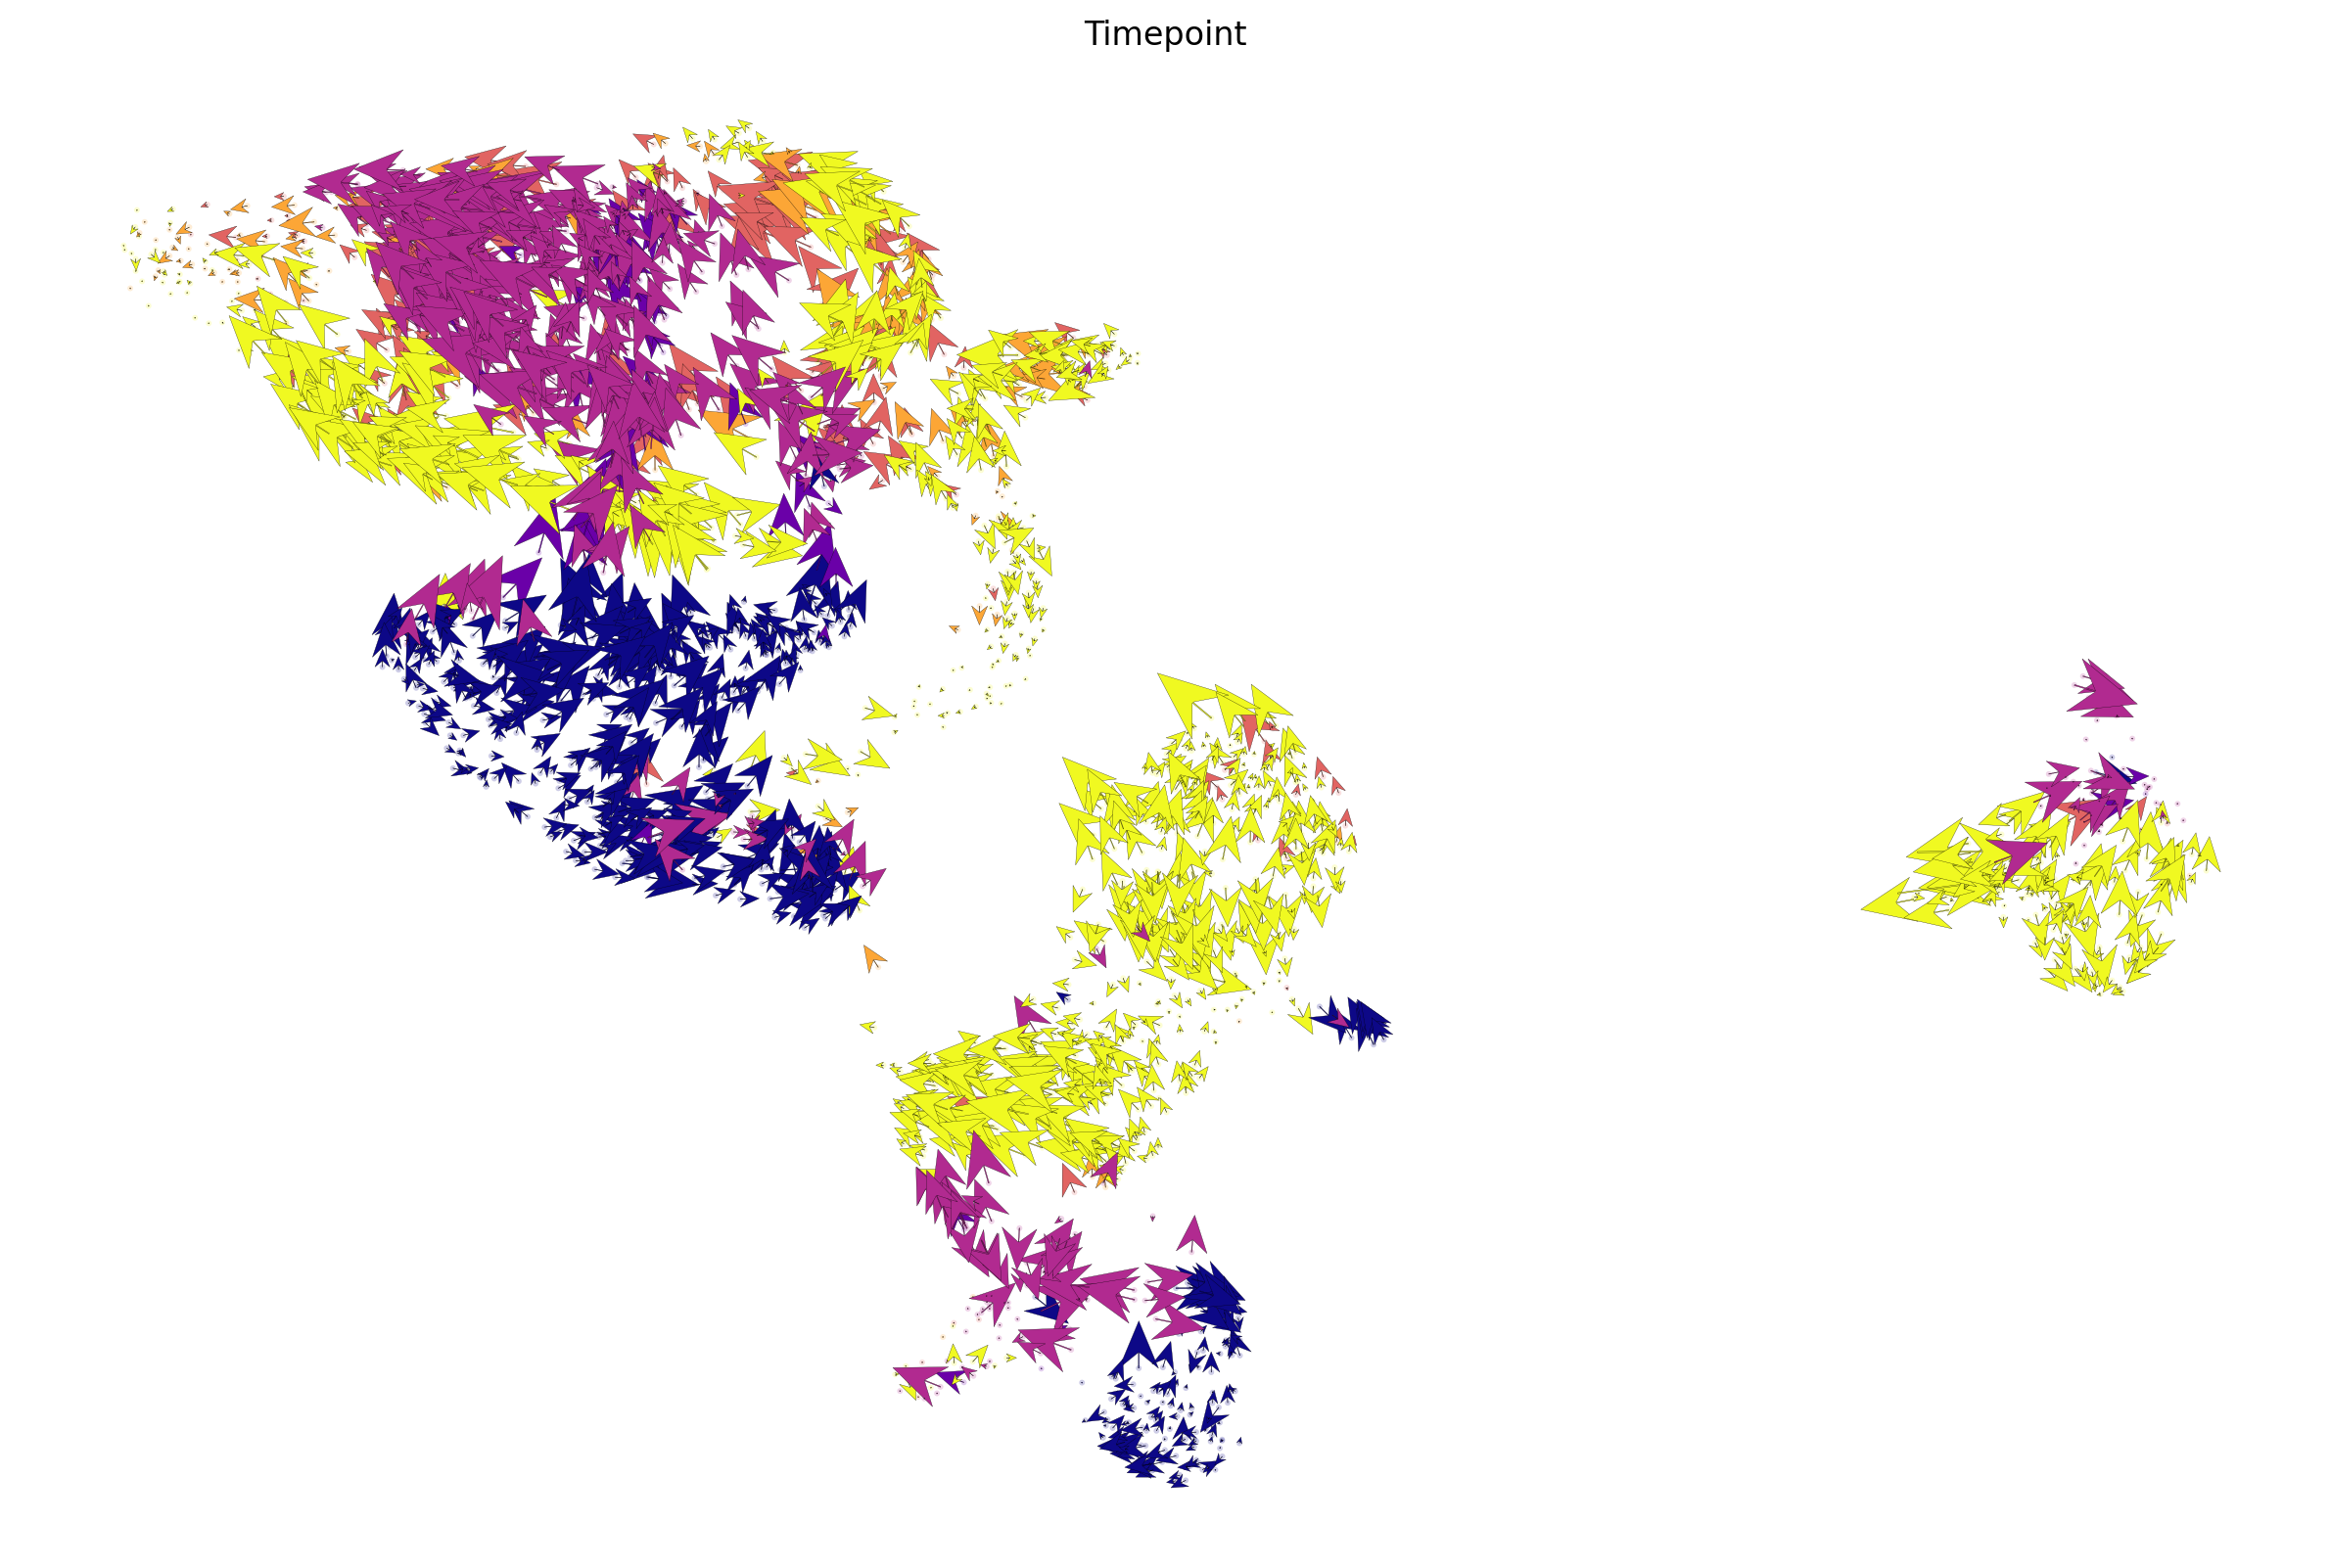

In [26]:
scv.pl.velocity_embedding(adata, basis = "umap", 
                          color = "Timepoint", 
                          arrow_length= 5, figsize=(15,10), arrow_size= 5,
                         save="VelocityPlot_embedding_Arrows_Timepoint.pdf")

saving figure to file ./figures/scvelo_VelocityPlot_GridArrows_Timepoint.pdf


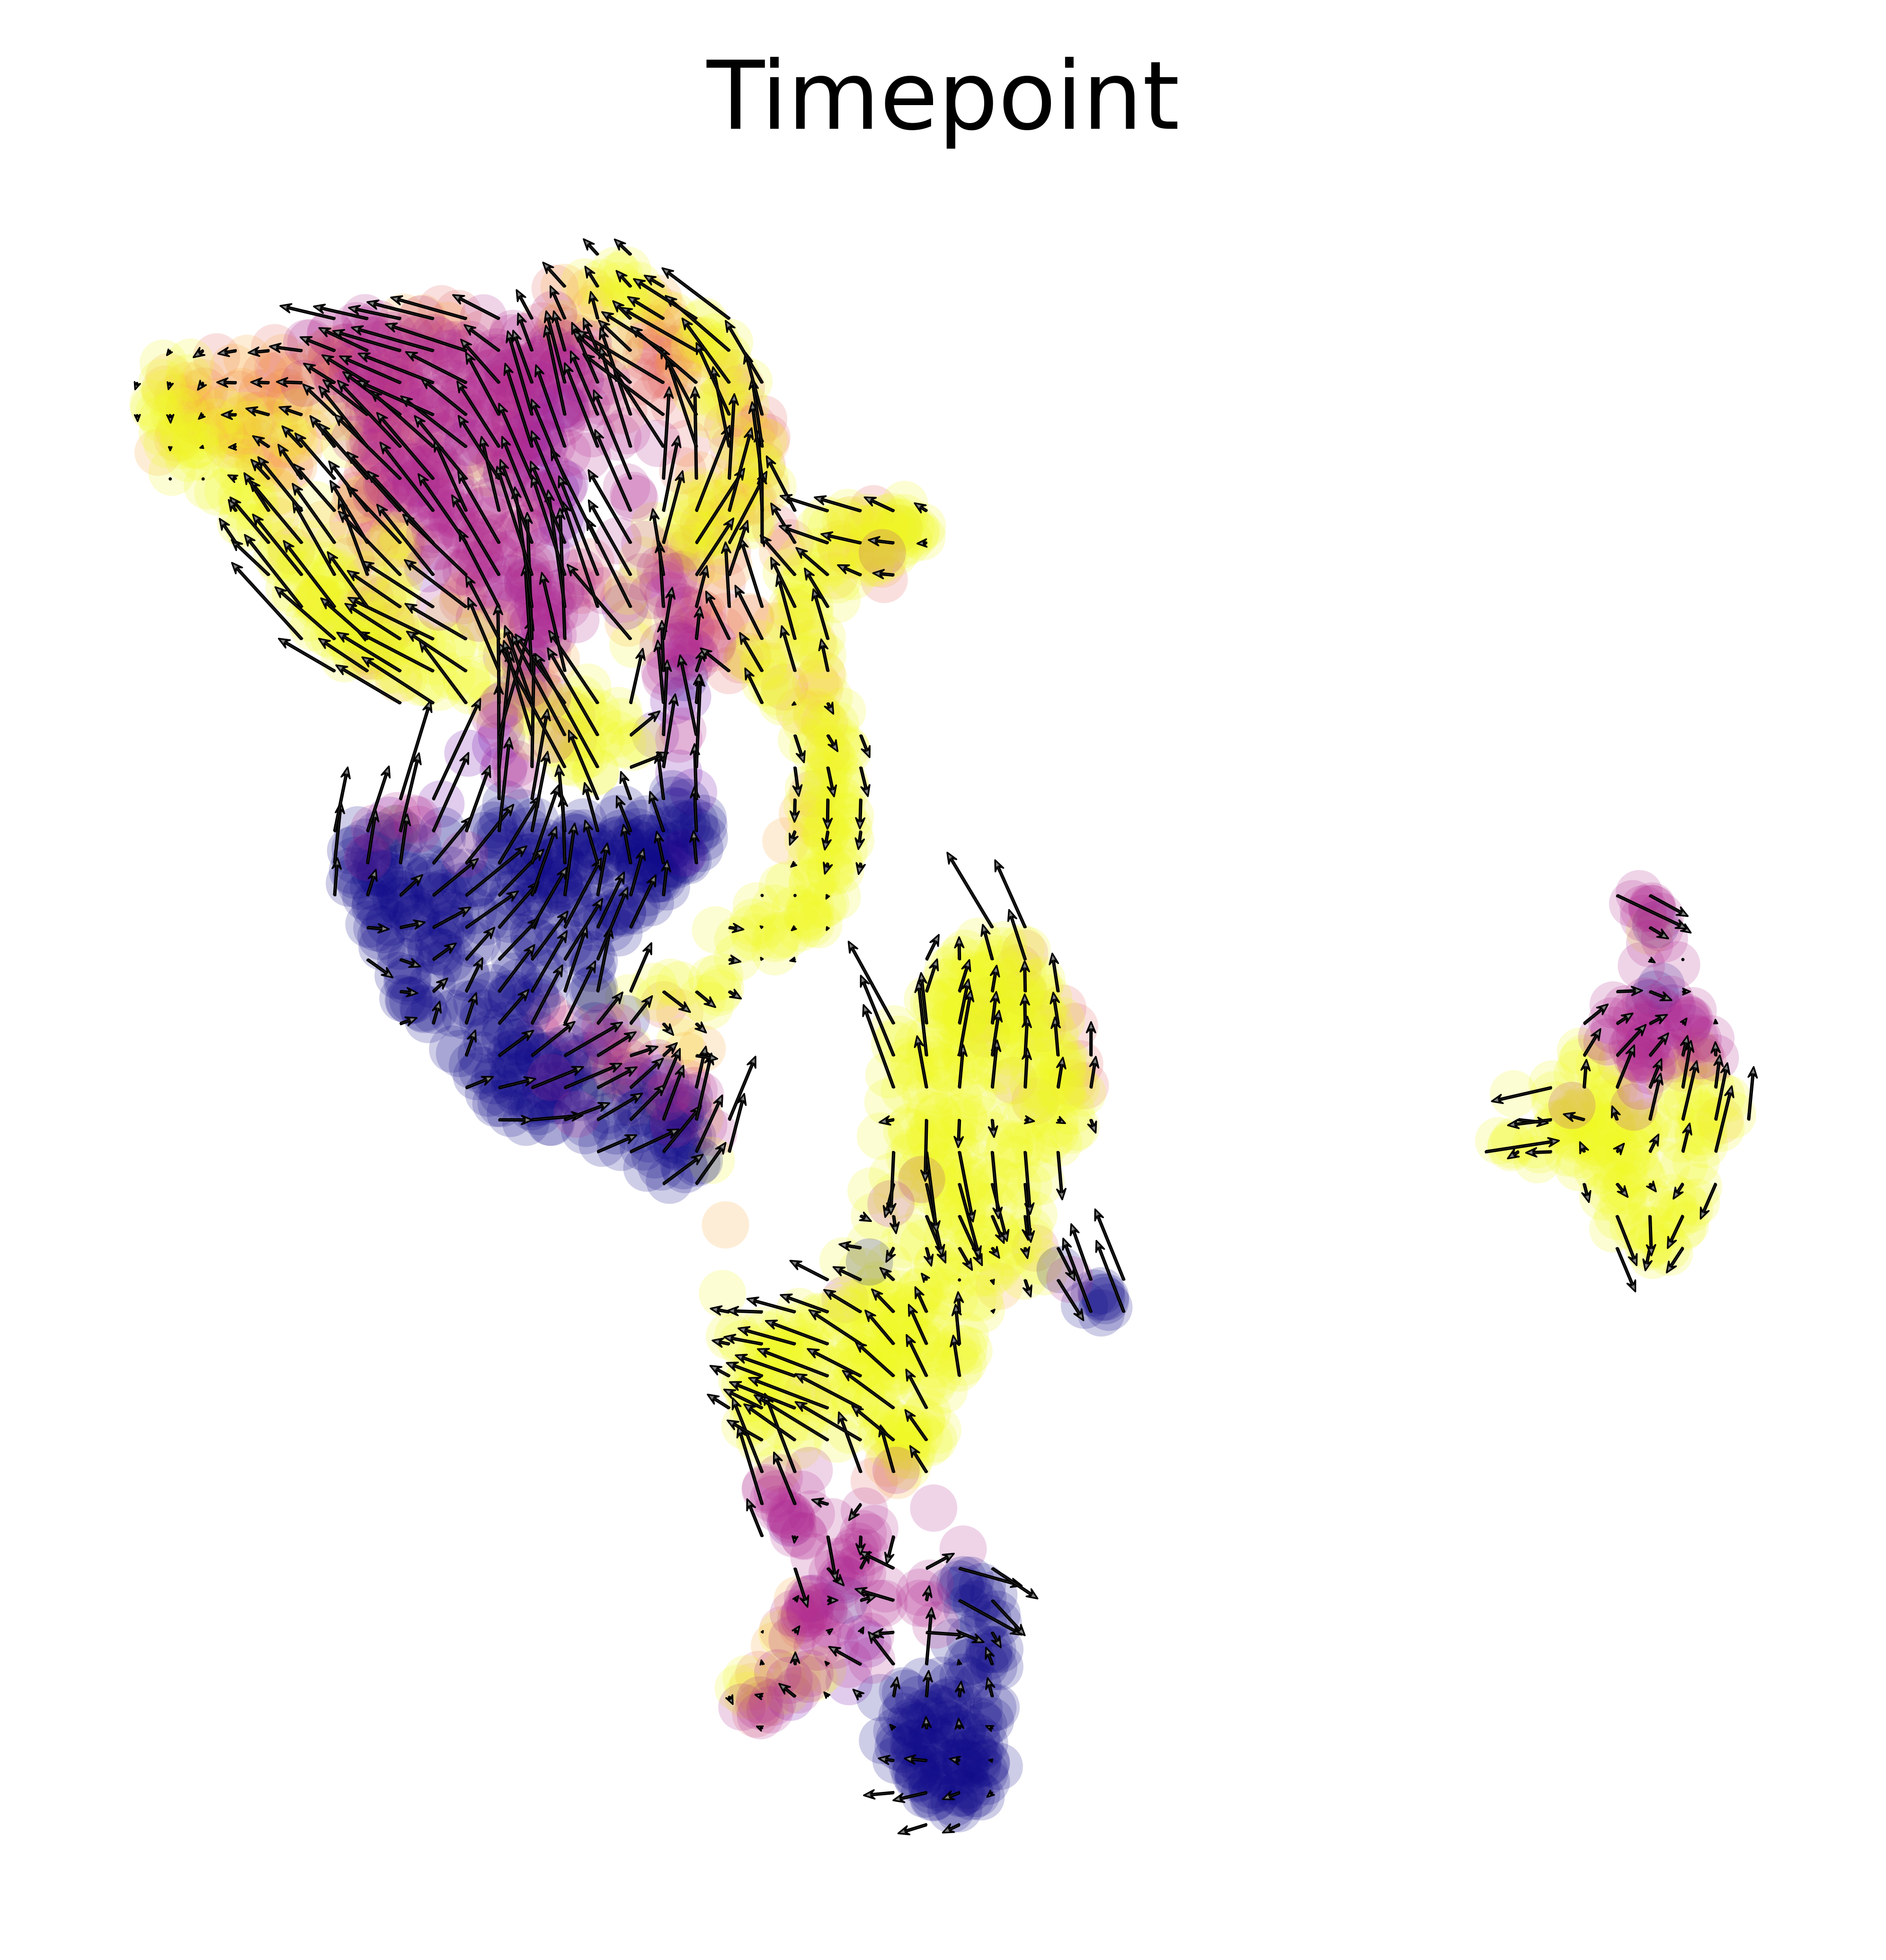

In [27]:
scv.pl.velocity_embedding_grid(adata, color = "Timepoint", figsize=(4,4),
                               arrow_length = 5, alpha=0.2, min_mass = 10,
                               dpi=600, 
                               save="VelocityPlot_GridArrows_Timepoint.pdf")

figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_VelocityPlot_Timepoint_smootharrows_thinlines.png


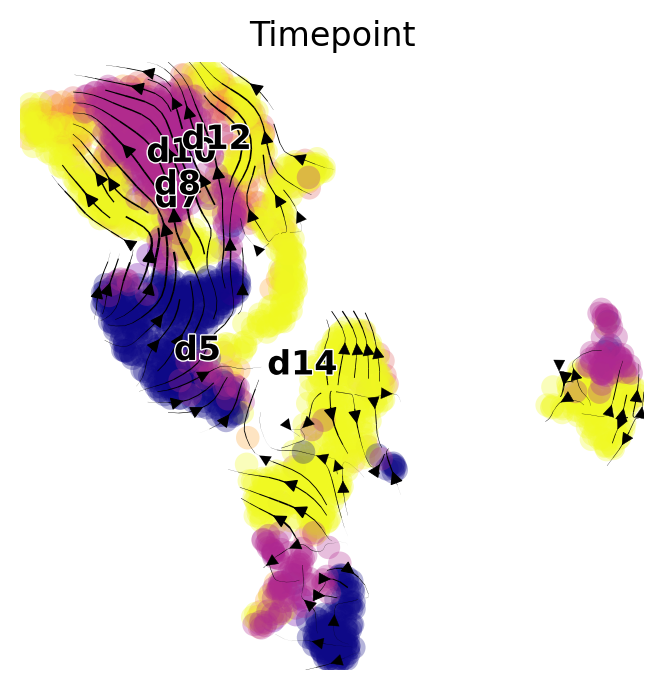

In [28]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="Timepoint", linewidth = 0.5,
                                 figsize=(4,4),save="VelocityPlot_Timepoint_smootharrows_thinlines.pdf")

figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_VelocityPlot_OriginalClusters_smootharrows_thinlines.png


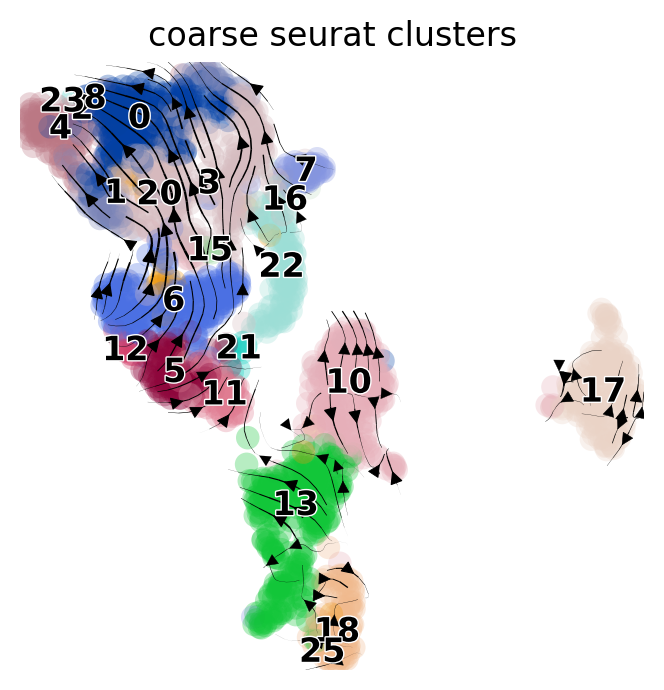

In [34]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="coarse_seurat_clusters", linewidth = 0.5,
                                 figsize=(4,4),save="VelocityPlot_OriginalClusters_smootharrows_thinlines.pdf")

figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_VelocityPlot_COL3A1_smootharrows_thinlines.png


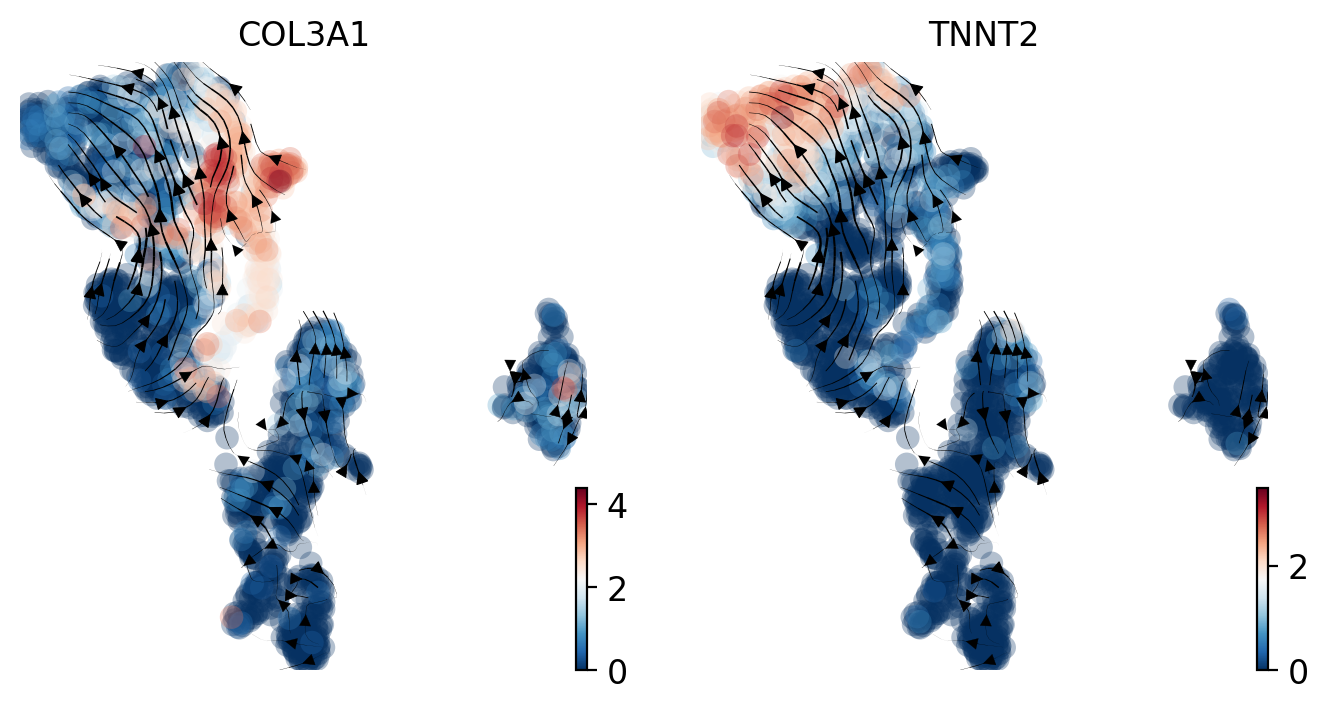

In [35]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color=["COL3A1","TNNT2"], linewidth = 0.5,
                                 figsize=(4,4),save="VelocityPlot_COL3A1_smootharrows_thinlines.pdf")

figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_VelocityPlot_ISL1_smootharrows_thinlines.png


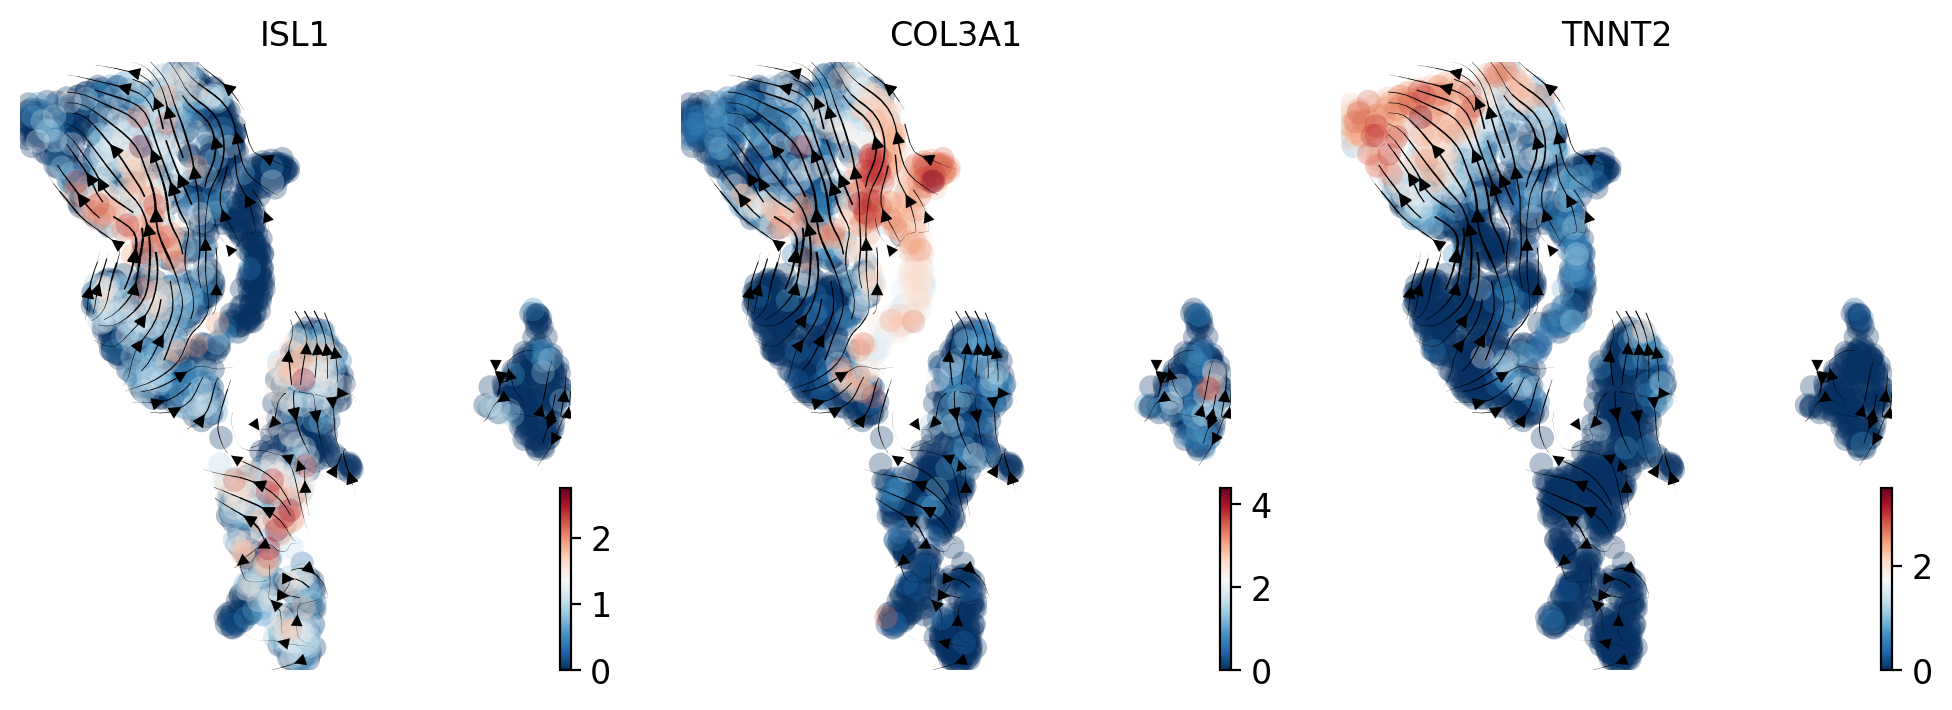

In [42]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color=["ISL1","COL3A1","TNNT2"], linewidth = 0.5,
                                 figsize=(4,4),save="VelocityPlot_ISL1_smootharrows_thinlines.pdf")

figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_VelocityPlot_OriginalClusters_smootharrows_thinlines.png


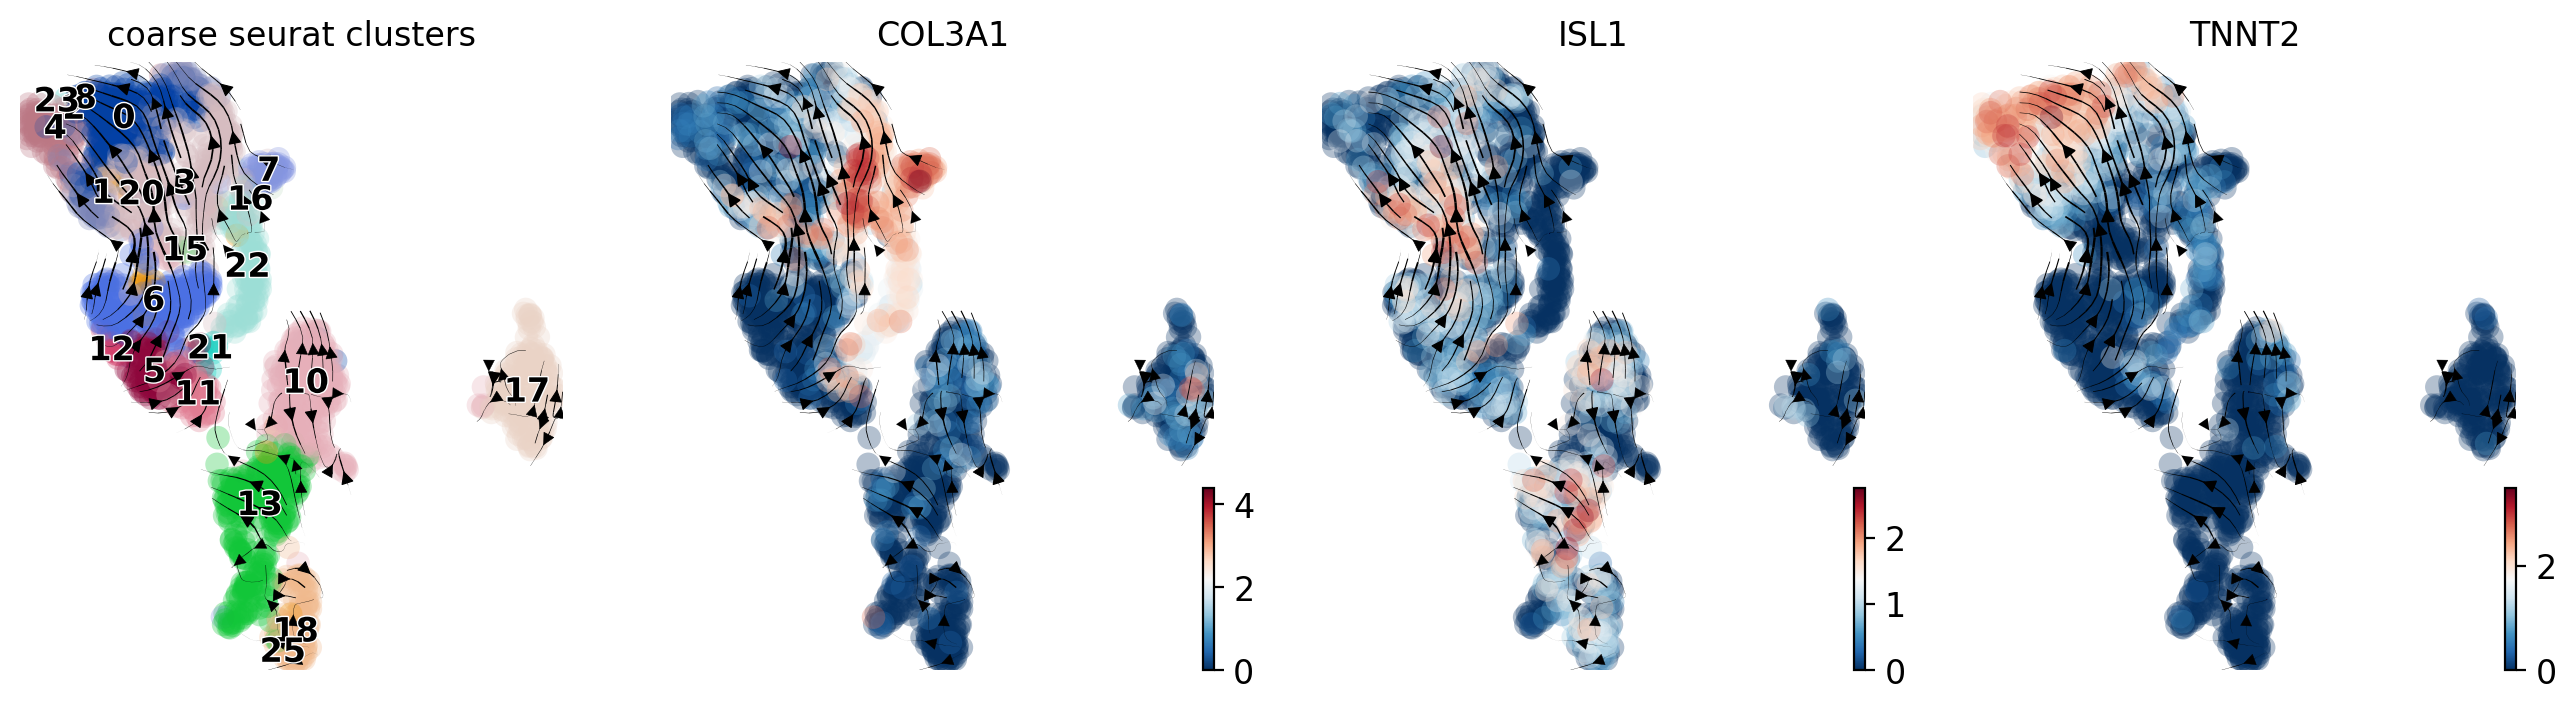

In [41]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color=["coarse_seurat_clusters","COL3A1","ISL1","TNNT2"], linewidth = 0.5,
                                 figsize=(4,4),save="VelocityPlot_OriginalClusters_smootharrows_thinlines.pdf")

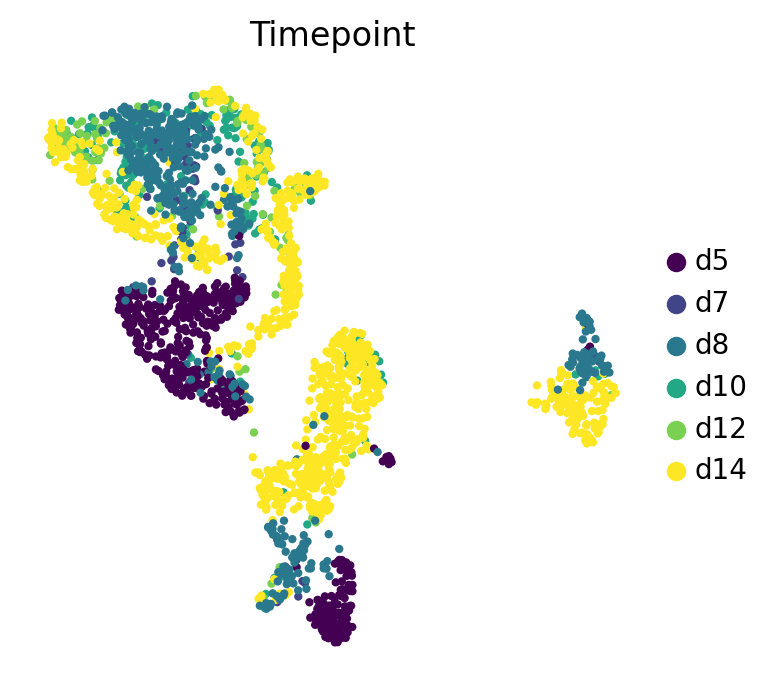

In [40]:
scv.pl.umap(adata, 
            color = "Timepoint", 
            palette = "viridis", 
            legend_loc='right margin', 
            legend_fontsize=10, 
            legend_fontoutline=2, 
            figsize = (4,4))

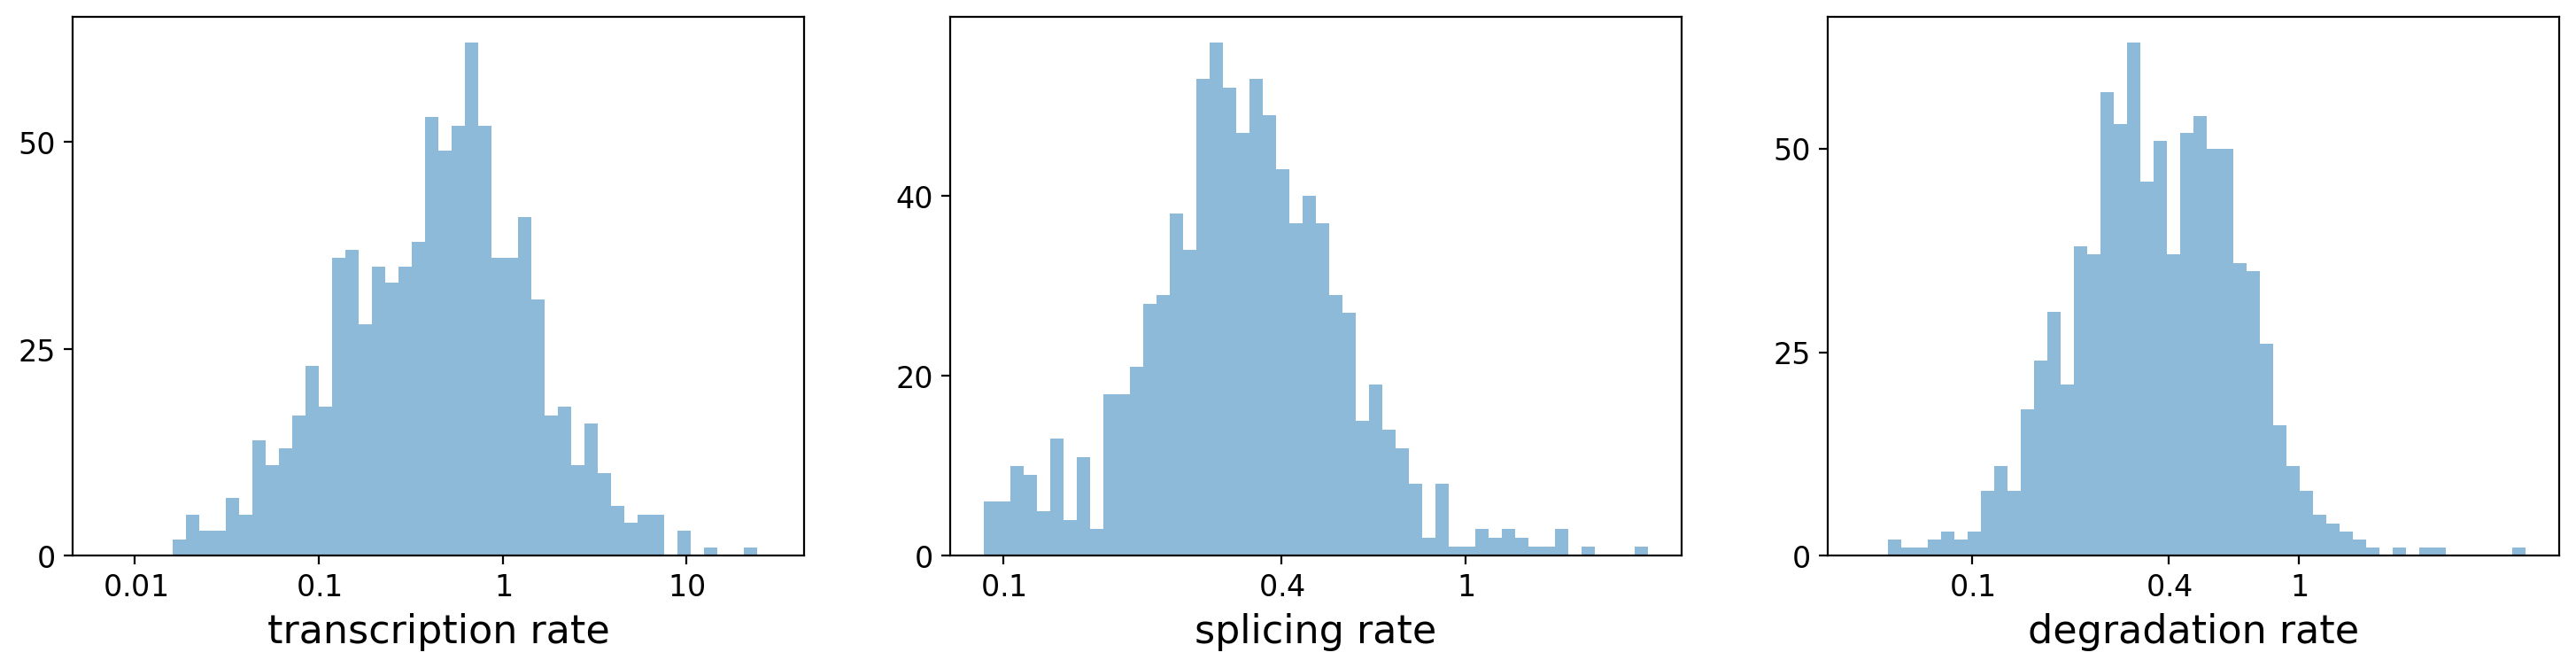

/vol/mbconda/snabel/anaconda3/envs/py_scvelo/lib/python3.8/site-packages/scvelo/read_load.py:406: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.var_names = df.index


fit_r2  fit_alpha  fit_beta  fit_gamma     fit_t_  fit_scaling  \
PLA2G5   0.773680   0.021636  0.084818   0.111566  17.828830     3.070876   
ALPL     0.375078   0.131168  0.766555   0.158028  13.539812     0.292152   
ZNF436   0.018071   0.963351  3.946368   0.185981   0.725315     0.639598   
C1orf63  0.771690   5.049265  7.156980   0.967314  13.282580     0.064519   
LIN28A   0.352762   1.290616  6.402427   0.247532  10.100195     0.052855   

         fit_std_u  fit_std_s  fit_likelihood  fit_u0  fit_s0  \
PLA2G5    0.105643   0.044149    3.418274e-01     0.0     0.0   
ALPL      0.045541   0.197319    1.988819e-01     0.0     0.0   
ZNF436    0.058509   0.158485    4.346730e-07     0.0     0.0   
C1orf63   0.117983   0.850319    2.073115e-01     0.0     0.0   
LIN28A    0.050001   1.440289    2.982818e-01     0.0     0.0   

         fit_pval_steady  fit_steady_u  fit_steady_s  fit_variance  \
PLA2G5          0.028661      0.236330      0.097461      0.358094   
ALPL            0.481880      0.159440      0.548840      0.399988   
ZNF436          0.478902      0.361160      0.365453      2.309389   
C1orf63         0.497442      0.668982      5.503516      0.630429   
LIN28A          0.487281      0.134767      3.071632      0.493425   

         fit_alignment_scaling  
PLA2G5                5.173406  
ALPL                  4.844815  
ZNF436                0.653701  
C1orf63               0.925799  
LIN28A                3.856353

In [32]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()


In [43]:
adata.write(subset_id + 'seuset_velocity.h5ad', compression='gzip')
#adata = scv.read('seuset_velocity.h5ad')